In [1]:
import json
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
import numpy as np
from pprint import pprint

## Visualized Instruction-Tuning Data

### Image-Conversation Synthetic Data

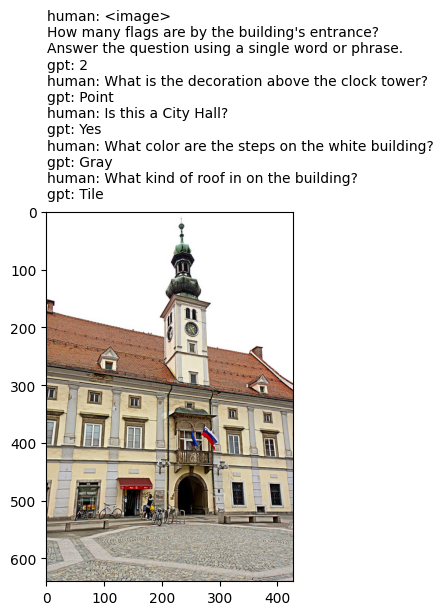

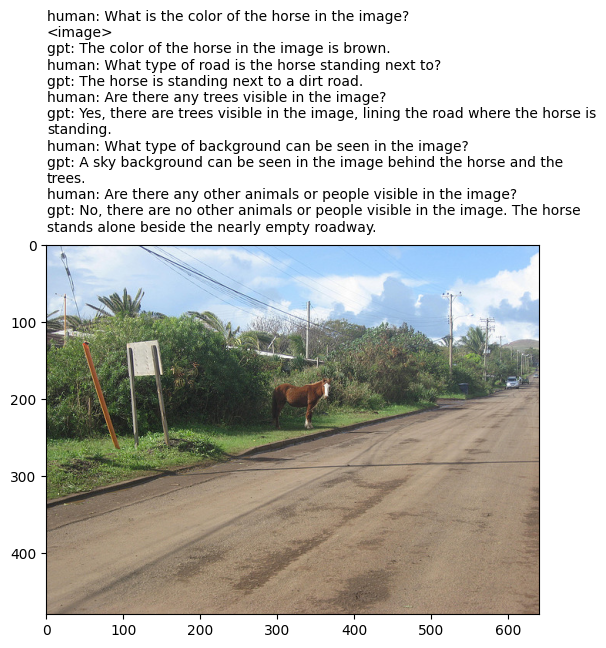

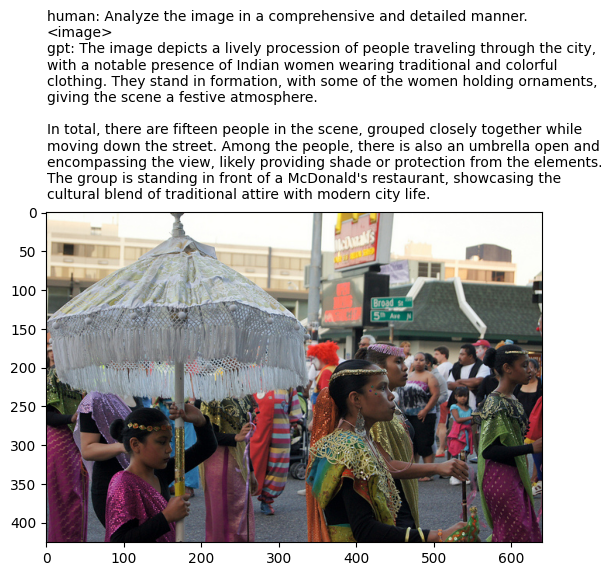

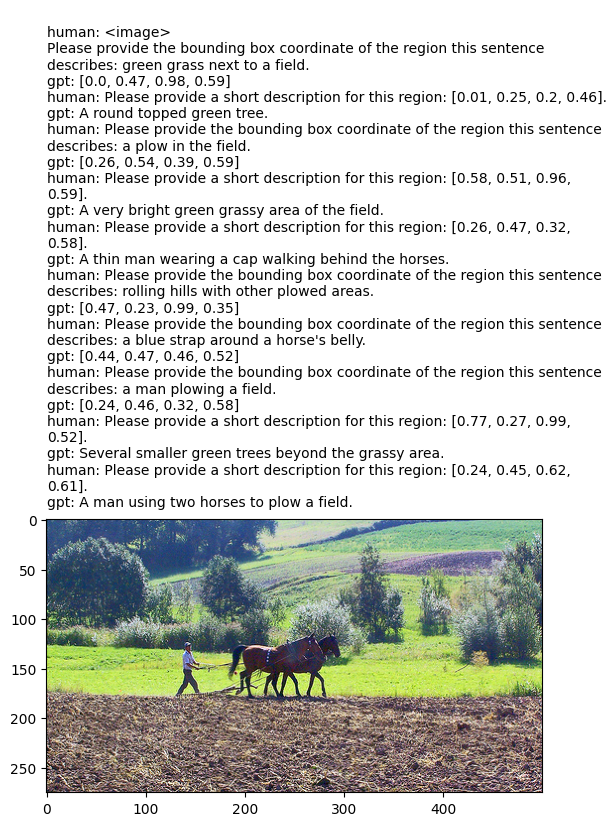

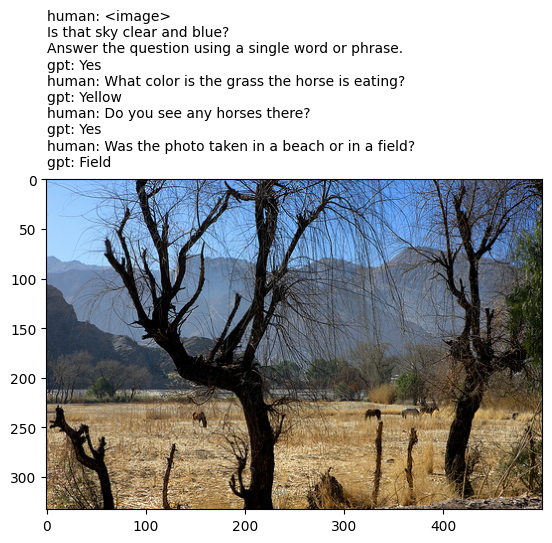

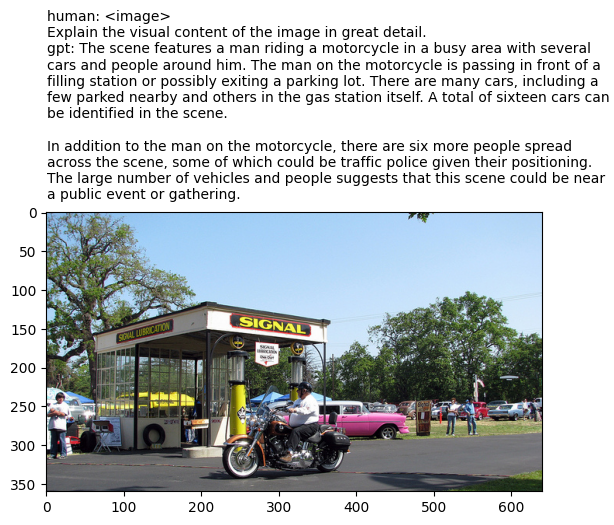

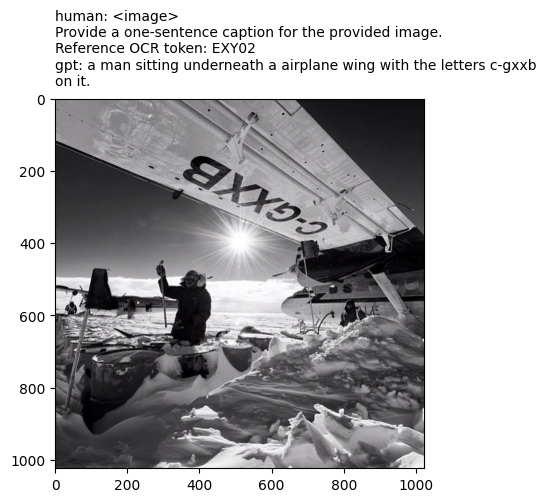

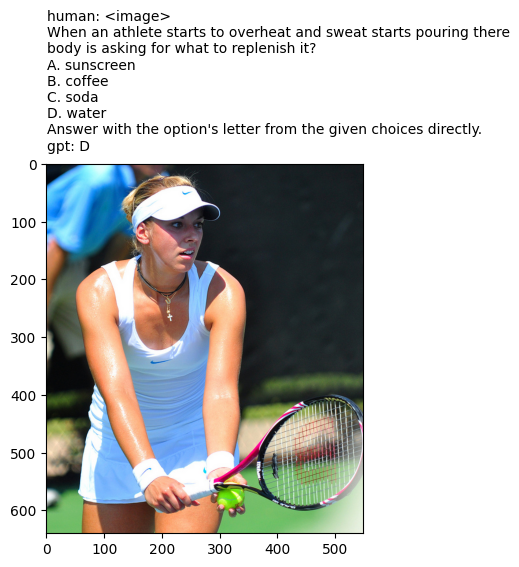

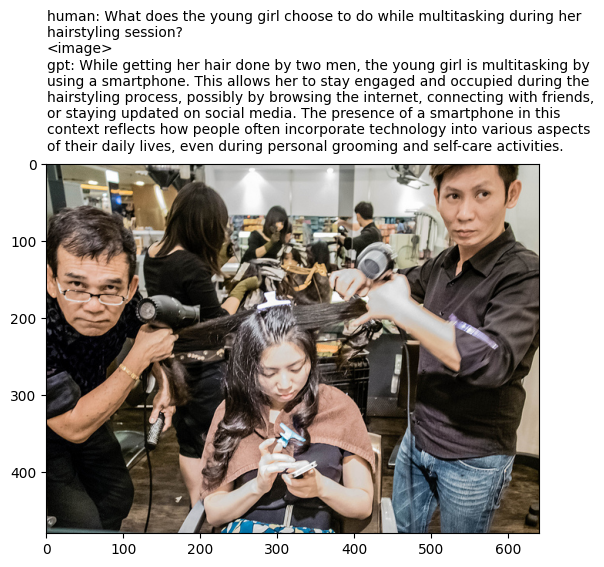

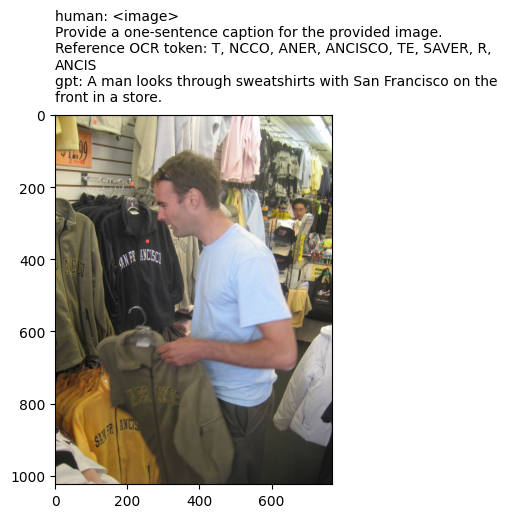

In [2]:
with open("playground/data/llava/llava_v1_5_mix665k.json") as hand:
    llava_665k = json.load(hand)

    N_SAMPLES = 10

    samples = np.random.randint(0, len(llava_665k), size=N_SAMPLES)
    dialogues = []

    for img_idx in samples:
        img_data = llava_665k[img_idx]

        while "image" not in img_data:
            new_sample = np.random.randint(0, len(llava_665k))
            img_data = llava_665k[new_sample]

        img = mpimg.imread("playground/data/llava/" + img_data["image"])
        plt.imshow(img)
        
        dialogue = ""
        for message in img_data["conversations"]:
            line = f'{message["from"]}: {message["value"]}'
            dialogue += line + "\n"

        dialogues.append(dialogue)
        
        plt.text(0.5, 0.5, s=dialogue, wrap=True, bbox=dict(boxstyle='square,pad=1', fc='none', ec='none'))
        plt.show()

In [3]:
with open("playground/data/llava/coco/annotations/captions_train2017.json") as f:
    coco_captions = json.load(f)
    print(coco_captions["annotations"][0])

{'image_id': 203564, 'id': 37, 'caption': 'A bicycle replica with a clock as the front wheel.'}


'found'
{'caption': "A tall building with a massive clock tower sticking out of it's "
            'roof.',
 'id': 254455,
 'image_id': 215410}
'found'
{'caption': 'A tourist attraction of a clock tower with a flag flying. ',
 'id': 256648,
 'image_id': 215410}
'found'
{'caption': 'large older building in a tourist attraction area',
 'id': 257242,
 'image_id': 215410}
'found'
{'caption': 'Old town building with clock tower on wide open cobblestone area.',
 'id': 260902,
 'image_id': 215410}
'found'
{'caption': 'The old building and the cobblestones suggest a European town.',
 'id': 261814,
 'image_id': 215410}
('human: <image>\n'
 "How many flags are by the building's entrance?\n"
 'Answer the question using a single word or phrase.\n'
 'gpt: 2\n'
 'human: What is the decoration above the clock tower?\n'
 'gpt: Point\n'
 'human: Is this a City Hall?\n'
 'gpt: Yes\n'
 'human: What color are the steps on the white building?\n'
 'gpt: Gray\n'
 'human: What kind of roof in on the building?

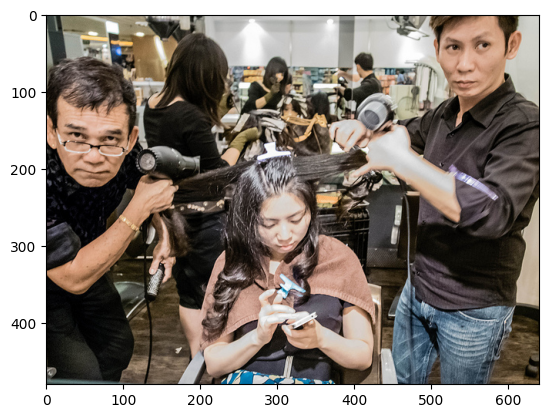

In [4]:
from pprint import pprint

for i in range(N_SAMPLES):
    sample = samples[i]
    data_point = llava_665k[sample]

    if "coco" not in data_point["image"]:
        continue

    coco_image_id = int(data_point['id'])

    for coco_caption in coco_captions["annotations"]:
        if coco_caption["image_id"] == coco_image_id:
            pprint("found")
            pprint(coco_caption)
    
    img = mpimg.imread("playground/data/llava/" + data_point["image"])
    plt.imshow(img)

    pprint("".join(dialogues[i]))

### Text-Only Conversations

In [7]:
with open("playground/data/llava/llava_v1_5_mix665k.json") as hand:
    llava_665k = json.load(hand)

    num_printed = 0
    num_text_only = 0

    for i in llava_665k:
        if "image" not in i:
            num_text_only += 1

            if num_printed < 10:
                num_printed += 1

                dialogue = []

                for message in img_data["conversations"]:
                    line = f'{message["from"]}: {message["value"]}'

                    dialogue.append(line)


                print("<Begin Text-Only Conversation>")
                print("\n".join(dialogue))
    print("================")
    print(f"{num_text_only} Text-Only Conversations")

                

<Begin Text-Only Conversation>
human: <image>
Provide a one-sentence caption for the provided image.
Reference OCR token: T, NCCO, ANER, ANCISCO, TE, SAVER, R, ANCIS
gpt: A man looks through sweatshirts with San Francisco on the front in a store.
<Begin Text-Only Conversation>
human: <image>
Provide a one-sentence caption for the provided image.
Reference OCR token: T, NCCO, ANER, ANCISCO, TE, SAVER, R, ANCIS
gpt: A man looks through sweatshirts with San Francisco on the front in a store.
<Begin Text-Only Conversation>
human: <image>
Provide a one-sentence caption for the provided image.
Reference OCR token: T, NCCO, ANER, ANCISCO, TE, SAVER, R, ANCIS
gpt: A man looks through sweatshirts with San Francisco on the front in a store.
<Begin Text-Only Conversation>
human: <image>
Provide a one-sentence caption for the provided image.
Reference OCR token: T, NCCO, ANER, ANCISCO, TE, SAVER, R, ANCIS
gpt: A man looks through sweatshirts with San Francisco on the front in a store.
<Begin Text-